<a href="https://colab.research.google.com/github/arstyav/Mini-Project-Data-Mining1/blob/main/checkPoint3_datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2021-2022 Regular Season NBA Player Stats Dataset

#**Import Library**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

## **Business Understanding**

### Business Objective
Tujuan utama dari analisis dataset "2021-2022 regular season NBA player stats per game" adalah untuk mendapatkan wawasan mendalam mengenai performa pemain NBA selama musim reguler tersebut. Fokus utama adalah memahami kontribusi individu pemain dalam berbagai aspek permainan, seperti penembakan, pertahanan, dan kontribusi poin, untuk membantu tim, penggemar, dan analis dalam membuat keputusan yang lebih informasional terkait strategi tim, evaluasi pemain, dan pemilihan pemain.

### Assess Situation:
Sebelum melangkah lebih jauh, perlu untuk memahami konteks dan tantangan yang dihadapi dalam analisis dataset ini. Beberapa pertimbangan melibatkan variasi peran pemain, perbedaan tim, dan potensi perubahan performa sepanjang musim. Selain itu, perlu diidentifikasi apakah ada faktor luar seperti cedera atau perubahan tim yang dapat mempengaruhi hasil.

### Data Mining Goals:
1. Identifikasi Pemain Berperforma Tinggi: Menemukan pemain-pemain yang memiliki kontribusi tinggi dalam kategori poin, rebound, assist, dan elemen permainan lainnya.
2. Analisis Efektivitas Penembakan: Menganalisis efektivitas penembakan pemain dengan mempertimbangkan persentase field goal, persentase three-point, dan efektivitas field goal (eFG%).
3. Eksplorasi Hubungan antar Variabel: Menjelajahi hubungan antara berbagai variabel seperti usia pemain dengan performa, jumlah game dimainkan, dan apakah ada pola dalam performa pemain sepanjang musim.
4. Tim Contribution Analysis: Menganalisis kontribusi individu terhadap keseluruhan performa tim dan bagaimana itu berkorelasi dengan hasil tim.

### Project Plan :
1. Data Collection:
Mengumpulkan dataset "2021-2022 regular season NBA player stats per game" dari sumber yang sah dan memverifikasi keakuratannya.
2. Data Preprocessing:
Melakukan pembersihan data, mengatasi nilai yang hilang, dan mengubah format data jika diperlukan.
3. Exploratory Data Analysis (EDA):
 Menjalankan analisis eksploratif untuk memahami distribusi data, melihat outlier, dan mendapatkan wawasan awal.
4. Feature Selection:
 Identifikasi variabel yang paling relevan dan signifikan dalam mencapai tujuan analisis.
5. Modeling:
 Jika diperlukan, penerapan model prediktif untuk mendukung identifikasi pemain berperforma tinggi berdasarkan data historis.
6. Evaluation:
 Mengevaluasi hasil dan wawasan yang diperoleh, memastikan keandalan analisis, dan melihat kesesuaian dengan tujuan awal.
7. Reporting:
Menyajikan temuan dalam bentuk laporan atau visualisasi yang mudah dimengerti oleh pemangku kepentingan.

## **Data Understanding**

### **Collect Initial Data**

Sumber data ini berasal dari web kaggle, berikut adalah link dataset nya https://www.kaggle.com/datasets/vivovinco/nba-player-stats

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/arstyav/Mini-Project-Data-Mining1/main/2021-2022%20NBA%20Player%20Stats%20-%20Playoffs%20(1).csv')

df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3


### **Describe Data**

#### Informasi Dasar

In [170]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,20,MEM,10,1,16.8,2.3,5.2,...,0.923,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9
213,214,Delon Wright,SG,29,ATL,5,0,27.4,3.0,5.8,...,0.667,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2
214,215,Thaddeus Young,PF,33,TOR,6,0,14.5,1.5,3.0,...,0.250,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3
215,216,Trae Young,PG,23,ATL,5,5,37.2,4.4,13.8,...,0.788,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4


Pada Dataset ini memiliki 217 Baris dan 30 Kolom.

#### Informasi Lanjutan

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

Berikut adalah penjelasan untuk setiap kolom dalam dataset NBA Player Stats:

1. **Rk (Rank)**: Nomor urut atau peringkat pemain dalam dataset.
2. **Player**: Nama pemain NBA.
3. **Pos (Position)**: Posisi bermain pemain (e.g., C untuk Center, SG untuk Shooting Guard).
4. **Age**: Usia pemain.
5. **Tm (Team)**: Tim tempat pemain bermain.
6. **G (Games played)**: Jumlah pertandingan yang dimainkan oleh pemain.
7. **GS (Games started)**: Jumlah pertandingan di mana pemain tersebut menjadi starter.
8. **MP (Minutes played per game)**: Rata-rata menit bermain per pertandingan.
9. **FG (Field goals per game)**: Rata-rata tembakan lapangan yang berhasil per pertandingan.
10. **FGA (Field goal attempts per game)**: Rata-rata upaya tembakan lapangan per pertandingan.
11. **FG% (Field goal percentage)**: Persentase keberhasilan tembakan lapangan.
12. **3P (3-point field goals per game)**: Rata-rata tembakan tiga poin yang berhasil per pertandingan.
13. **3PA (3-point field goal attempts per game)**: Rata-rata upaya tembakan tiga poin per pertandingan.
14. **3P% (3-point field goal percentage)**: Persentase keberhasilan tembakan tiga poin.
15. **2P (2-point field goals per game)**: Rata-rata tembakan dua poin yang berhasil per pertandingan.
16. **2PA (2-point field goal attempts per game)**: Rata-rata upaya tembakan dua poin per pertandingan.
17. **2P% (2-point field goal percentage)**: Persentase keberhasilan tembakan dua poin.
18. **eFG% (Effective field goal percentage)**: Persentase efektif keberhasilan tembakan lapangan, termasuk poin ekstra untuk tembakan tiga poin.
19. **FT (Free throws per game)**: Rata-rata lemparan bebas yang berhasil per pertandingan.
20. **FTA (Free throw attempts per game)**: Rata-rata upaya lemparan bebas per pertandingan.
21. **FT% (Free throw percentage)**: Persentase keberhasilan lemparan bebas.
22. **ORB (Offensive rebounds per game)**: Rata-rata rebound ofensif per pertandingan.
23. **DRB (Defensive rebounds per game)**: Rata-rata rebound defensif per pertandingan.
24. **TRB (Total rebounds per game)**: Rata-rata total rebound per pertandingan.
25. **AST (Assists per game)**: Rata-rata assist per pertandingan.
26. **STL (Steals per game)**: Rata-rata steal per pertandingan.
27. **BLK (Blocks per game)**: Rata-rata block per pertandingan.
28. **TOV (Turnovers per game)**: Rata-rata turnover per pertandingan.
29. **PF (Personal fouls per game)**: Rata-rata pelanggaran per pertandingan.
30. **PTS (Points per game)**: Rata-rata poin yang dicetak per pertandingan.

#### Informasi Statistik Deskriptif

In [172]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,109.000000,26.589862,8.714286,4.009217,19.429032,3.045161,6.737788,0.437516,0.934562,2.700461,...,0.623249,0.773733,2.626728,3.404147,1.828571,0.584793,0.361290,1.085714,1.784332,8.457143
std,62.786676,4.238545,5.802412,5.944178,12.879892,2.699843,5.865455,0.184581,0.969323,2.538454,...,0.344243,0.848965,2.203811,2.842360,2.007120,0.499629,0.453458,1.126790,1.175811,7.625418
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,23.000000,5.000000,0.000000,7.600000,1.000000,2.000000,0.370000,0.000000,0.500000,...,0.500000,0.200000,1.000000,1.200000,0.400000,0.200000,0.000000,0.300000,0.800000,2.100000
50%,109.000000,26.000000,6.000000,0.000000,18.400000,2.300000,4.700000,0.439000,0.700000,2.200000,...,0.750000,0.500000,2.000000,2.800000,1.000000,0.500000,0.200000,0.800000,1.800000,6.000000
75%,163.000000,29.000000,12.000000,6.000000,31.200000,4.500000,10.000000,0.500000,1.500000,4.400000,...,0.857000,1.000000,3.700000,4.800000,2.700000,0.900000,0.500000,1.500000,2.800000,12.600000
max,217.000000,38.000000,24.000000,24.000000,44.000000,12.200000,23.800000,1.000000,4.100000,10.400000,...,1.000000,5.500000,12.000000,14.300000,9.800000,2.100000,2.500000,6.200000,4.700000,31.700000



Output tersebut adalah hasil statistik deskriptif untuk setiap kolom dalam dataset NBA Player Stats. Mari kita jelaskan masing-masing bagian dari output tersebut:

1. **count**: Menunjukkan jumlah entri (pemain) dalam setiap kolom. Semua kolom memiliki nilai count yang sama (217), menunjukkan bahwa tidak ada nilai yang hilang pada dataset ini.

2. **mean (rata-rata)**: Menunjukkan nilai rata-rata dari setiap kolom. Contohnya, rata-rata usia pemain adalah sekitar 26.59 tahun, rata-rata jumlah pertandingan yang dimainkan adalah sekitar 8.71, dan seterusnya.

3. **std (standar deviasi)**: Menunjukkan sejauh mana nilai-nilai dalam setiap kolom tersebar dari nilai rata-ratanya. Standar deviasi yang lebih tinggi menunjukkan variasi yang lebih besar dari rata-rata.

4. **min (nilai minimum)**: Menunjukkan nilai terkecil dalam setiap kolom. Misalnya, usia minimum adalah 19 tahun, dan jumlah pertandingan minimum adalah 1.

5. **25% (kuartil pertama)**: Menunjukkan nilai yang membagi 25% data terendah. Misalnya, pada kolom FG (Field Goals per Game), 25% pemain memiliki rata-rata tembakan lapangan per game di bawah 1.

6. **50% (kuartil kedua atau median)**: Menunjukkan nilai yang membagi 50% data. Median sering digunakan untuk menggambarkan nilai tengah dari distribusi data.

7. **75% (kuartil ketiga)**: Menunjukkan nilai yang membagi 75% data terendah. Misalnya, pada kolom TRB (Total Rebounds per Game), 75% pemain memiliki rata-rata rebound per game di bawah 4.8.

8. **max (nilai maksimum)**: Menunjukkan nilai tertinggi dalam setiap kolom. Misalnya, jumlah pertandingan maksimum adalah 24, dan poin per game maksimum adalah 31.7.

### **Exploratory Data Analysis**

#### Visualisasi Jumlah Pemain Berdasarkan Posisi

<ipython-input-173-09dae8f83989>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




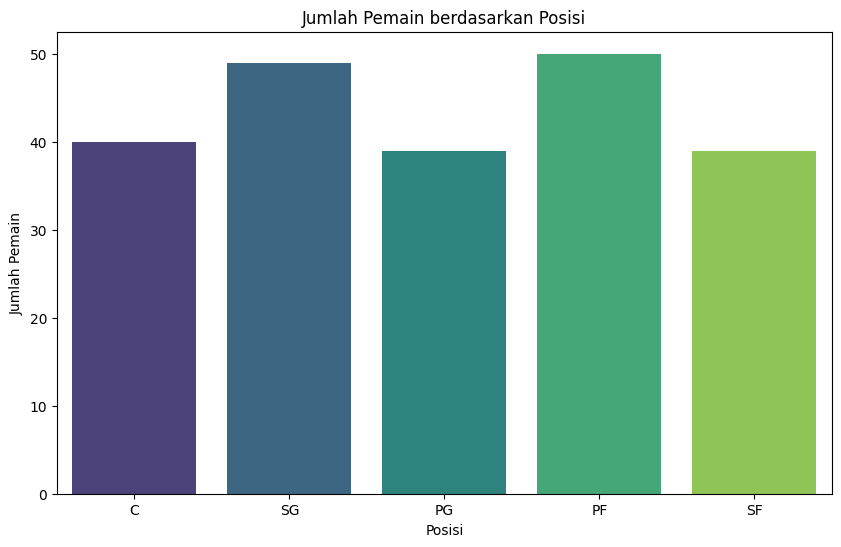

In [173]:
# Bar Plot Jumlah Pemain berdasarkan Posisi
plt.figure(figsize=(10, 6))
sns.countplot(x='Pos', data=df, palette='viridis')
plt.title('Jumlah Pemain berdasarkan Posisi')
plt.xlabel('Posisi')
plt.ylabel('Jumlah Pemain')
plt.show()

Jumlah Pemain berdasarkan Posisi: Judul grafik menyatakan tujuan dari visualisasi ini, yaitu menampilkan distribusi jumlah pemain berdasarkan posisi.

**Axe X (Posisi)**: Pada sumbu x, kita memiliki kategori posisi pemain (misalnya, C untuk Center, SG untuk Shooting Guard, SF untuk Small Forward, PG untuk Point Guard, PF untuk Power Forward). Setiap batang pada grafik mewakili satu posisi.

**Axe Y (Jumlah Pemain)**: Pada sumbu y, kita memiliki jumlah pemain untuk setiap posisi. Tinggi batang menunjukkan seberapa banyak pemain yang memiliki posisi tertentu.

**Palette 'viridis'**: Warna batang yang digunakan diambil dari palet warna 'viridis'. Palet warna ini sering digunakan untuk visualisasi data kuantitatif karena memberikan kontrast yang baik dan mudah dibaca.

#### Visualisasi Distribusi Umur Pemain

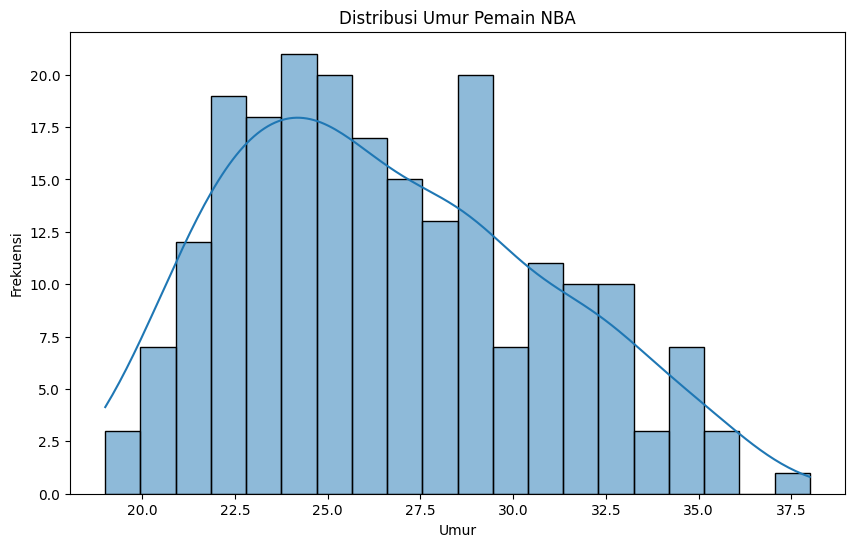

In [174]:
# Visualisasi distribusi umur pemain
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Umur Pemain NBA')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()


**Axe X (Umur)**: Pada sumbu x, kita memiliki variabel umur pemain. Interval umur dibagi menjadi bins, dan setiap batang mewakili sejumlah pemain dalam bin tersebut.

**Axe Y (Frekuensi)**: Pada sumbu y, kita memiliki frekuensi atau jumlah pemain untuk setiap bin umur. Tinggi batang menunjukkan seberapa sering umur tertentu muncul dalam dataset.

**KDE (Kernel Density Estimation)**: Grafik ini juga menunjukkan kurva KDE yang mendekati distribusi probabilitas dari data umur. Ini memberikan perkiraan visual tentang distribusi data secara keseluruhan.

**Banyak Bins (20)**: Data umur dibagi menjadi 20 bins, yang memberikan gambaran rinci tentang sebaran umur pemain.

1. Dari grafik ini, kita dapat melihat sebaran umur pemain dalam dataset.
2. Puncak atau puncak tertinggi pada kurva menunjukkan di mana umur pemain paling sering muncul.
3. Dengan melihat keseluruhan distribusi, kita dapat mendapatkan gambaran tentang apakah dataset cenderung memiliki pemain yang lebih muda, lebih tua, atau memiliki distribusi umur yang merata.

#### Korelasi Antar Variabel

<ipython-input-175-07b1d11407f6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



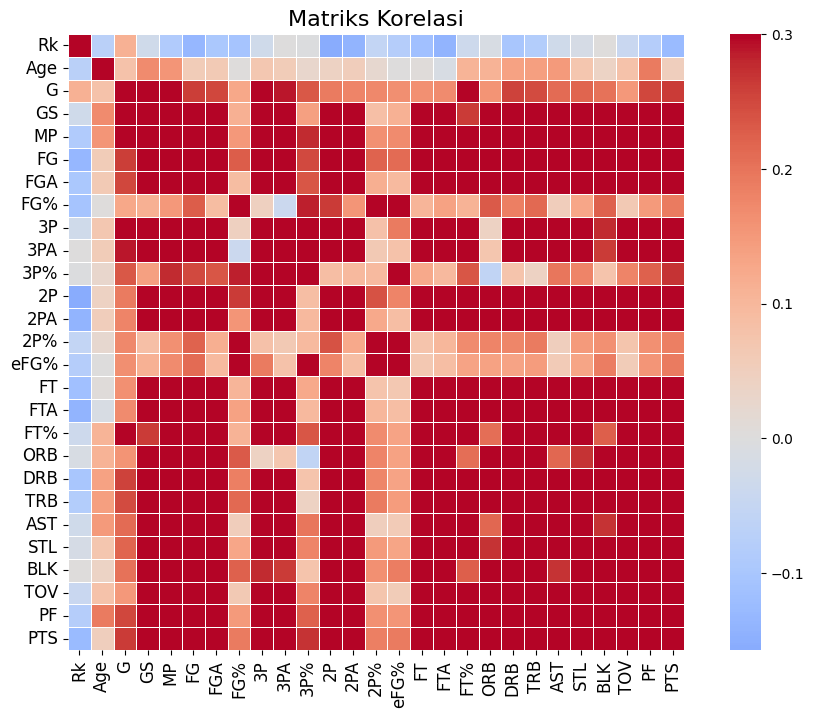

In [175]:
# Korelasi antar variabel
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Custom color map with high contrast (contoh menggunakan palet "coolwarm")
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=False)

# Add a title
plt.title('Matriks Korelasi', fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Palet "coolwarm": Ini adalah palet warna yang digunakan untuk membedakan nilai-nilai pada heatmap. Warna dingin (biru) menunjukkan korelasi negatif, sementara warna hangat (merah) menunjukkan korelasi positif.

1. Korelasi antar variabel dapat dilihat dari heatmap. Semakin dekat nilai warna dengan 1 atau -1, semakin tinggi korelasinya.
2. Korelasi positif terlihat dengan warna yang lebih terang, sedangkan korelasi negatif terlihat dengan warna yang lebih gelap.
3. Heatmap membantu mengidentifikasi pola dan hubungan antar variabel dalam dataset, yang dapat digunakan untuk analisis lebih lanjut atau pemilihan fitur.

#### Visualisasi Perbandingan Jumlah Pemain Per Tim

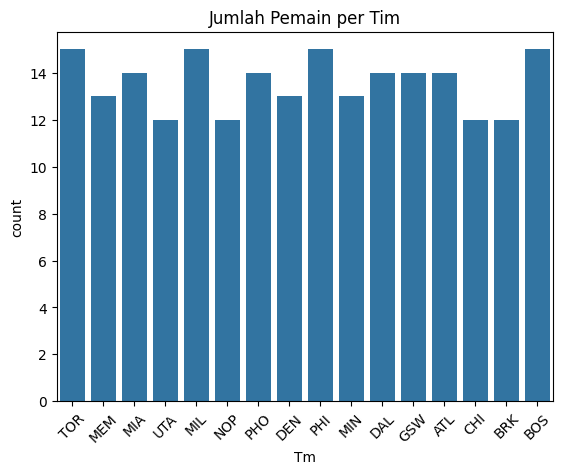

In [176]:
sns.countplot(x='Tm', data=df)
plt.title('Jumlah Pemain per Tim')
plt.xticks(rotation=45)
plt.show()

1. Grafik ini memberikan gambaran tentang distribusi jumlah pemain di setiap tim dalam dataset.
2. Tim dengan batang lebih tinggi memiliki lebih banyak pemain, sementara tim dengan batang lebih pendek memiliki jumlah pemain yang lebih sedikit.
3. Count plot berguna untuk melihat sebaran keseimbangan atau ketidakseimbangan dalam distribusi pemain di seluruh tim, dan ini dapat memberikan wawasan awal tentang komposisi pemain di berbagai tim.

### **Verify Data Quality**

#### Missing Values

In [177]:
df.isna()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
df.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

Berdasarkan data diatas terlihat bahwa tidak ada missing values atau data yang hilang pada data tersebut.

#### Outliers Values

In [179]:
# Fungsi untuk menemukan outliers berdasarkan IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Pilih kolom yang ingin diperiksa outliers
columns_to_check = ['PTS', 'AST', 'TRB', 'STL', 'BLK']

# Loop untuk menemukan dan memvisualisasikan outliers pada setiap kolom
for column in columns_to_check:
    outliers = find_outliers_iqr(df, column)

    # Tampilkan informasi outliers dalam bentuk tabel
    print(f'Outliers pada kolom {column}:')
    print(tabulate(outliers, headers='keys', tablefmt='fancy_grid'))
    print('\n')

Outliers pada kolom PTS:
╒═════╤══════╤═══════════════════════╤═══════╤═══════╤══════╤═════╤══════╤══════╤══════╤═══════╤═══════╤══════╤═══════╤═══════╤══════╤═══════╤═══════╤════════╤══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤══════╤═══════╕
│     │   Rk │ Player                │ Pos   │   Age │ Tm   │   G │   GS │   MP │   FG │   FGA │   FG% │   3P │   3PA │   3P% │   2P │   2PA │   2P% │   eFG% │   FT │   FTA │   FT% │   ORB │   DRB │   TRB │   AST │   STL │   BLK │   TOV │   PF │   PTS │
╞═════╪══════╪═══════════════════════╪═══════╪═══════╪══════╪═════╪══════╪══════╪══════╪═══════╪═══════╪══════╪═══════╪═══════╪══════╪═══════╪═══════╪════════╪══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪══════╪═══════╡
│   7 │    8 │ Giannis Antetokounmpo │ PF    │    27 │ MIL  │  12 │   12 │ 37.3 │ 11.7 │  23.8 │ 0.491 │  0.8 │   3.4 │ 0.22  │ 10.9 │  20.3 │ 0.537 │  0.507 │  7.6 │  11.2 │ 0.679 │   2.2 │  12   │  14.2 │   6.8 

1. **PTS (Points per Game):**
Pemain dengan rata-rata poin per pertandingan di luar batas bawah atau batas atas dianggap sebagai outliers. Ini bisa mencerminkan pemain yang sangat efisien atau tidak efisien dalam mencetak poin.

2. **AST (Assists per Game):**
Outliers pada kolom ini dapat menunjukkan pemain yang memiliki distribusi assist yang tidak umum. Pemain dengan jumlah assist yang sangat tinggi atau rendah per pertandingan dianggap sebagai outliers.

3. **TRB (Total Rebounds per Game):**
Outliers dalam kolom ini menunjukkan pemain dengan jumlah rebound yang sangat tinggi atau rendah per pertandingan. Ini bisa mencerminkan keterampilan rebound yang luar biasa atau kurangnya kontribusi dalam hal rebound.

4. **STL (Steals per Game):**
Outliers pada kolom ini dapat mengindikasikan pemain dengan jumlah steal yang tidak umum. Pemain dengan kemampuan mencuri bola yang sangat baik atau sebaliknya dapat dianggap sebagai outliers.

5. **BLK (Blocks per Game):**
Outliers dalam kolom ini mungkin menunjukkan pemain dengan jumlah blok yang sangat tinggi atau rendah per pertandingan. Ini bisa mencerminkan kemampuan pemain dalam membela atau kekurangan kontribusi dalam hal blok.

#### Duplicate Values

In [180]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
212    False
213    False
214    False
215    False
216    False
Length: 217, dtype: bool

Pada data diatas sebagian besar data tidak ada yang terduplikasi.

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [181]:
print((df.isna().sum() / len(df)) * 100)

Rk        0.0
Player    0.0
Pos       0.0
Age       0.0
Tm        0.0
G         0.0
GS        0.0
MP        0.0
FG        0.0
FGA       0.0
FG%       0.0
3P        0.0
3PA       0.0
3P%       0.0
2P        0.0
2PA       0.0
2P%       0.0
eFG%      0.0
FT        0.0
FTA       0.0
FT%       0.0
ORB       0.0
DRB       0.0
TRB       0.0
AST       0.0
STL       0.0
BLK       0.0
TOV       0.0
PF        0.0
PTS       0.0
dtype: float64


hasil query diatas menunjukan bahwa tidak ada data yang hilang pada dataset ini

#####**Pengecekkan Ulang**

In [182]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Rk,0.0
Player,0.0
Pos,0.0
Age,0.0
Tm,0.0
G,0.0
GS,0.0
MP,0.0
FG,0.0
FGA,0.0


setelah di cek ulang tetap tidak ada data yang hilang pada data ini

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [183]:
df[df.duplicated()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


#####**Hapus Nilai Duplikat**

In [184]:
df = df.drop_duplicates()

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [185]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Rk,0.000000
Age,0.000000
G,2.764977
GS,7.373272
MP,0.000000
FG,1.843318
FGA,1.382488
FG%,12.903226
3P,0.921659
3PA,0.460829


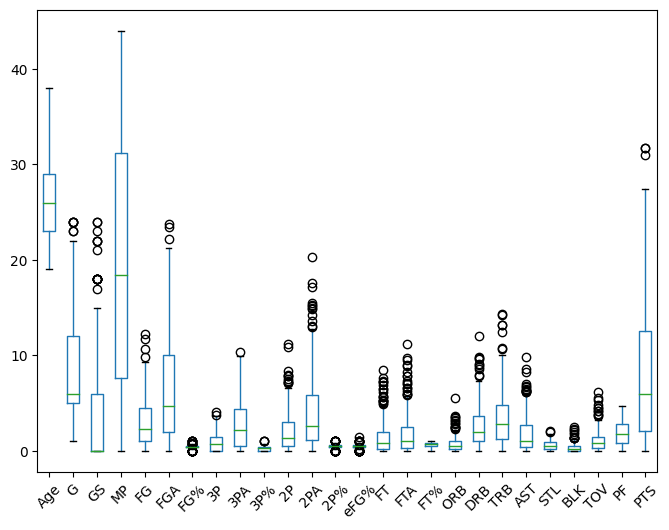

In [186]:
boxplot = df.drop('Rk', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

In [187]:
Q1 = df['FG%'].quantile(0.25)
Q3 = df['FG%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FG%'] >= lower_bound) & (df['FG%'] <= upper_bound)]

saya menghapus outliers dengan kolom FG% dikarenakan sdh melebihi batas 10%

In [188]:
Q1 = df['2P%'].quantile(0.25)
Q3 = df['2P%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['2P%'] >= lower_bound) & (df['2P%'] <= upper_bound)]

saya menghapus outliers dengan kolom 2P% dikarenakan sdh melebihi batas 10%

In [189]:
Q1 = df['eFG%'].quantile(0.25)
Q3 = df['eFG%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['eFG%'] >= lower_bound) & (df['eFG%'] <= upper_bound)]

saya menghapus outliers dengan kolom eFG% dikarenakan sdh melebihi batas 10%

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom dibawah ini

In [190]:
Q1 = df['Rk'].quantile(0.25)
Q3 = df['Rk'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Rk']=np.where(df['Rk']>upper_whisker,upper_whisker,np.where(df['Rk']<lower_whisker,lower_whisker,df['Rk']))

melakukan pengisian data pada kolom yang kosong,yaitu kolom Rk.

In [191]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

melakukan pengisian data pada kolom yang kosong, yaitu kolom Age.

In [192]:
Q1 = df['MP'].quantile(0.25)
Q3 = df['MP'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['MP']=np.where(df['MP']>upper_whisker,upper_whisker,np.where(df['MP']<lower_whisker,lower_whisker,df['MP']))

melakukan pengisian data pada kolom yang kosong,yaitu kolom MP.

In [193]:
Q1 = df['FT%'].quantile(0.25)
Q3 = df['FT%'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['FT%']=np.where(df['FT%']>upper_whisker,upper_whisker,np.where(df['FT%']<lower_whisker,lower_whisker,df['FT%']))

melakukan pengisian data pada kolom yang kosong,yaitu kolom FT%.

In [194]:
Q1 = df['PF'].quantile(0.25)
Q3 = df['PF'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['PF']=np.where(df['PF']>upper_whisker,upper_whisker,np.where(df['PF']<lower_whisker,lower_whisker,df['PF']))

melakukan pengisian data pada kolom yang kosong,yaitu kolom PF.

#####**Pengecekkan Ulang**

In [195]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Rk,0.000000
Age,0.000000
G,0.000000
GS,9.411765
MP,0.000000
FG,1.176471
FGA,0.000000
FG%,4.117647
3P,0.588235
3PA,0.000000


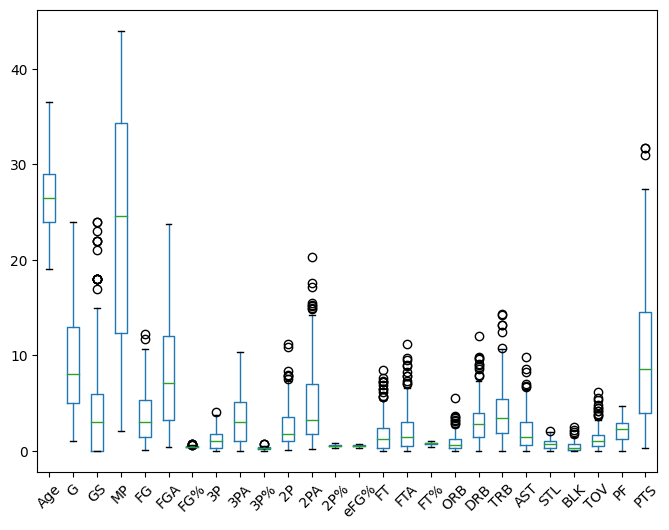

In [196]:
boxplot = df.drop('Rk', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [197]:
def age_group(Age):
    if Age < 25:
        return 'Young'
    elif Age >= 25 and Age <= 30:
        return 'Middle-aged'
    else:
        return 'Old'

df['Age_Group'] = df['Age'].apply(age_group)

hasil dari query diatas yaitu membuat fungsi age_group yang akan mengelompokkan usia pemain, menambahkan kolom baru 'Age_Group' ke dalam DataFrame, dan kemudian menampilkan DataFrame dengan kolom baru tersebut.

###**Pengecekkan Hasil**

In [198]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age_Group
0,1.0,Precious Achiuwa,C,22.0,TOR,6,1,27.8,4.2,8.7,...,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2,Young
1,2.0,Steven Adams,C,28.0,MEM,7,5,16.3,1.3,3.0,...,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4,Middle-aged
2,3.0,Bam Adebayo,C,24.0,MIA,18,18,34.1,5.8,9.7,...,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8,Young
4,5.0,Grayson Allen,SG,26.0,MIL,12,5,25.4,3.1,6.8,...,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3,Middle-aged
5,6.0,Jose Alvarado,PG,23.0,NOP,6,0,19.5,2.7,5.5,...,0.3,1.0,1.3,1.5,1.2,0.2,1.2,3.0,8.0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213.0,Ziaire Williams,SF,20.0,MEM,10,1,16.8,2.3,5.2,...,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9,Young
213,214.0,Delon Wright,SG,29.0,ATL,5,0,27.4,3.0,5.8,...,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2,Middle-aged
214,215.0,Thaddeus Young,PF,33.0,TOR,6,0,14.5,1.5,3.0,...,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3,Old
215,216.0,Trae Young,PG,23.0,ATL,5,5,37.2,4.4,13.8,...,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4,Young


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [199]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [200]:
df = df.drop(['Rk', 'Tm'], axis=1)

Query tersebut menghapus kolom 'Rk' dan 'Tm' dari DataFrame df.

- 'Rk' adalah singkatan dari 'Rank' (peringkat). Biasanya, kolom ini tidak memberikan informasi yang berguna karena ini hanyalah nomor baris dalam dataset yang telah diurutkan. Oleh karena itu, kolom 'Rk' seringkali dianggap tidak relevan dan dihapus.
- 'Tm' adalah singkatan dari 'Team' (tim). Kolom ini mungkin memberikan informasi tentang tim mana yang dimainkan oleh setiap pemain, tetapi tergantung pada analisis yang dilakukan, mungkin tidak diperlukan untuk tujuan tertentu. Jika analisis lebih berfokus pada statistik individual pemain daripada tim, maka kolom ini juga bisa dianggap tidak relevan dan dihapus.

###**Pengecekkan Hasil**

In [201]:
df.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age_Group
0,Precious Achiuwa,C,22.0,6,1,27.8,4.2,8.7,0.481,0.8,...,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2,Young
1,Steven Adams,C,28.0,7,5,16.3,1.3,3.0,0.429,0.0,...,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4,Middle-aged
2,Bam Adebayo,C,24.0,18,18,34.1,5.8,9.7,0.594,0.0,...,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8,Young
4,Grayson Allen,SG,26.0,12,5,25.4,3.1,6.8,0.451,1.6,...,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3,Middle-aged
5,Jose Alvarado,PG,23.0,6,0,19.5,2.7,5.5,0.485,1.0,...,0.3,1.0,1.3,1.5,1.2,0.2,1.2,3.0,8.0,Young


#**Data Transformation**

###**Mapping**

In [202]:
position_mapping = {
    'C': 'Center',
    'SG': 'Shooting Guard',
    'PF': 'Power Forward',
    'SF': 'Small Forward',
    'PG': 'Point Guard'
}

# Lakukan pemetaan nilai pada kolom 'Pos'
df['Pos'] = df['Pos'].map(position_mapping)

In [203]:
df

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age_Group
0,Precious Achiuwa,Center,22.0,6,1,27.8,4.2,8.7,0.481,0.8,...,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2,Young
1,Steven Adams,Center,28.0,7,5,16.3,1.3,3.0,0.429,0.0,...,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4,Middle-aged
2,Bam Adebayo,Center,24.0,18,18,34.1,5.8,9.7,0.594,0.0,...,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8,Young
4,Grayson Allen,Shooting Guard,26.0,12,5,25.4,3.1,6.8,0.451,1.6,...,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3,Middle-aged
5,Jose Alvarado,Point Guard,23.0,6,0,19.5,2.7,5.5,0.485,1.0,...,0.3,1.0,1.3,1.5,1.2,0.2,1.2,3.0,8.0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Ziaire Williams,Small Forward,20.0,10,1,16.8,2.3,5.2,0.442,1.1,...,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9,Young
213,Delon Wright,Shooting Guard,29.0,5,0,27.4,3.0,5.8,0.517,1.0,...,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2,Middle-aged
214,Thaddeus Young,Power Forward,33.0,6,0,14.5,1.5,3.0,0.500,0.2,...,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3,Old
215,Trae Young,Point Guard,23.0,5,5,37.2,4.4,13.8,0.319,1.4,...,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4,Young


Query tersebut melakukan pemetaan nilai pada kolom 'Pos' (posisi) dari singkatan posisi menjadi nama lengkap posisi.

Pertama, kita mendefinisikan position_mapping, sebuah kamus yang berisi pasangan kunci-nilai di mana kunci adalah singkatan posisi ('C', 'SG', 'PF', 'SF', 'PG'), sedangkan nilai adalah nama lengkap posisi ('Center', 'Shooting Guard', 'Power Forward', 'Small Forward', 'Point Guard').

Kemudian, kita menggunakan metode .map() pada kolom 'Pos' dari DataFrame (df['Pos']) untuk menerapkan pemetaan nilai tersebut. Ini akan mengubah nilai dalam kolom 'Pos' sesuai dengan nilai yang didefinisikan dalam position_mapping.

Misalnya, jika sebelumnya baris pertama memiliki nilai 'C' dalam kolom 'Pos', setelah query tersebut dieksekusi, nilainya akan berubah menjadi 'Center'. Hal yang sama berlaku untuk nilai-nilai lain dalam kolom 'Pos' sesuai dengan pemetaan yang telah ditentukan dalam position_mapping.

###**Encoding**

In [204]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [205]:
df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Player_Zach LaVine,Player_Ziaire Williams,Pos_Center,Pos_Point Guard,Pos_Power Forward,Pos_Shooting Guard,Pos_Small Forward,Age_Group_Middle-aged,Age_Group_Old,Age_Group_Young
0,22.0,6,1,27.8,4.2,8.7,0.481,0.8,2.7,0.313,...,0,0,1,0,0,0,0,0,0,1
1,28.0,7,5,16.3,1.3,3.0,0.429,0.0,0.0,0.000,...,0,0,1,0,0,0,0,1,0,0
2,24.0,18,18,34.1,5.8,9.7,0.594,0.0,0.1,0.000,...,0,0,1,0,0,0,0,0,0,1
4,26.0,12,5,25.4,3.1,6.8,0.451,1.6,4.0,0.396,...,0,0,0,0,0,1,0,1,0,0
5,23.0,6,0,19.5,2.7,5.5,0.485,1.0,2.7,0.375,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,20.0,10,1,16.8,2.3,5.2,0.442,1.1,3.6,0.306,...,0,1,0,0,0,0,1,0,0,1
213,29.0,5,0,27.4,3.0,5.8,0.517,1.0,2.6,0.385,...,0,0,0,0,0,1,0,1,0,0
214,33.0,6,0,14.5,1.5,3.0,0.500,0.2,1.2,0.143,...,0,0,0,0,1,0,0,0,1,0
215,23.0,5,5,37.2,4.4,13.8,0.319,1.4,7.6,0.184,...,0,0,0,1,0,0,0,0,0,1


Hasil dari encoding pada dataset tersebut adalah representasi dari nilai-nilai yang awalnya dalam bentuk teks atau kategorikal, telah diubah menjadi representasi numerik. Hal ini umum dilakukan untuk mempersiapkan data kategorikal untuk pemrosesan oleh algoritma pembelajaran mesin yang memerlukan input dalam bentuk numerik.

Sebagai contoh:

- Kolom 'Pos' (posisi) yang awalnya berisi singkatan posisi pemain seperti 'C' (Center), 'SG' (Shooting Guard), 'PF' (Power Forward), 'SF' (Small Forward), dan 'PG' (Point Guard), telah diubah menjadi beberapa kolom baru yang merepresentasikan masing-masing posisi dalam bentuk biner. Misalnya, kolom 'Pos_Center', 'Pos_Shooting Guard', dan sebagainya, dengan nilai 1 menunjukkan keberadaan posisi tersebut untuk baris tertentu, dan nilai 0 menunjukkan sebaliknya.

- Kolom 'Age_Group' yang awalnya berisi kategori usia seperti 'Young', 'Middle-aged', dan 'Old', juga telah diubah menjadi beberapa kolom baru yang merepresentasikan masing-masing kategori usia dalam bentuk biner. Misalnya, 'Age_Group_Young', 'Age_Group_Middle-aged', dan 'Age_Group_Old', dengan nilai 1 menunjukkan kategori usia tersebut untuk baris tertentu, dan nilai 0 menunjukkan sebaliknya.

# **Hasil Data Cleaning**

In [206]:
df_cleaned = df.dropna()

print('\nData setelah cleaning:')
print(df_cleaned.head())


Data setelah cleaning:
    Age   G  GS    MP   FG  FGA    FG%   3P  3PA    3P%  ...  \
0  22.0   6   1  27.8  4.2  8.7  0.481  0.8  2.7  0.313  ...   
1  28.0   7   5  16.3  1.3  3.0  0.429  0.0  0.0  0.000  ...   
2  24.0  18  18  34.1  5.8  9.7  0.594  0.0  0.1  0.000  ...   
4  26.0  12   5  25.4  3.1  6.8  0.451  1.6  4.0  0.396  ...   
5  23.0   6   0  19.5  2.7  5.5  0.485  1.0  2.7  0.375  ...   

   Player_Zach LaVine  Player_Ziaire Williams  Pos_Center  Pos_Point Guard  \
0                   0                       0           1                0   
1                   0                       0           1                0   
2                   0                       0           1                0   
4                   0                       0           0                0   
5                   0                       0           0                1   

   Pos_Power Forward  Pos_Shooting Guard  Pos_Small Forward  \
0                  0                   0                  0

In [207]:
df_cleaned.to_csv('Data_Cleaning.csv', index= False)